In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import os
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten,Dense

In [7]:
train='/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/train'
test='/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/test'
validation='/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/validation'

In [3]:
import os
print(os.listdir(train))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [4]:
batch_size = 32
target_size = (224,224)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train_datagen.flow_from_directory(train,target_size=target_size,batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test_datagen.flow_from_directory(test,target_size=target_size,batch_size=batch_size,class_mode='categorical',subset='validation')

Found 1820 images belonging to 6 classes.
Found 48 images belonging to 6 classes.


In [9]:
labels = list(train_generator.class_indices.keys())
print(labels)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [10]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten,Dense

In [11]:
num_classes = len(labels)

In [12]:
input_shape = (224,224,3)

In [13]:

model = models.Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=(224,224,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                        

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
num_epochs = 50
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size

In [16]:
history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_generator, validation_steps=STEP_SIZE_TEST)

Epoch 1/50
56/56 [==============================] - 668s 12s/step - loss: 1.4806 - accuracy: 0.4933 - val_loss: 1.9218 - val_accuracy: 0.1562
Epoch 2/50
56/56 [==============================] - 30s 536ms/step - loss: 1.1330 - accuracy: 0.5845 - val_loss: 1.8628 - val_accuracy: 0.2812
Epoch 3/50
56/56 [==============================] - 31s 543ms/step - loss: 1.0204 - accuracy: 0.6314 - val_loss: 2.4152 - val_accuracy: 0.1562
Epoch 4/50
56/56 [==============================] - 31s 545ms/step - loss: 0.9553 - accuracy: 0.6639 - val_loss: 1.8314 - val_accuracy: 0.2812
Epoch 5/50
56/56 [==============================] - 29s 525ms/step - loss: 0.9061 - accuracy: 0.6711 - val_loss: 2.0821 - val_accuracy: 0.1875
Epoch 6/50
56/56 [==============================] - 30s 532ms/step - loss: 0.8480 - accuracy: 0.6935 - val_loss: 1.9358 - val_accuracy: 0.3125
Epoch 7/50
56/56 [==============================] - 30s 532ms/step - loss: 0.7998 - accuracy: 0.7148 - val_loss: 1.8581 - val_accuracy: 0.4688


In [17]:
loss, acc = model.evaluate(test_generator, steps=STEP_SIZE_TEST)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

1/1 [==============================] - 0s 260ms/step - loss: 2.9251 - accuracy: 0.4375
The accuracy of the model is 0.438
The Loss in the model is 2.925


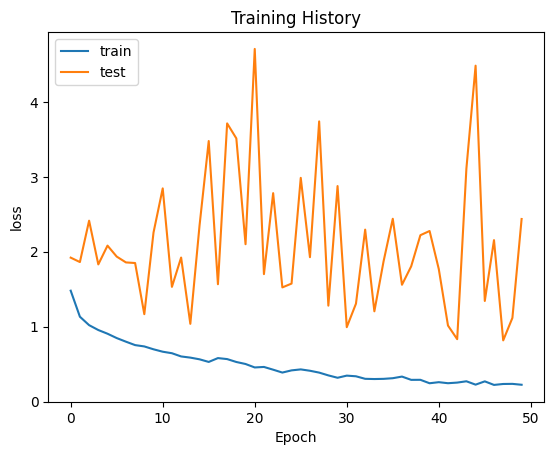

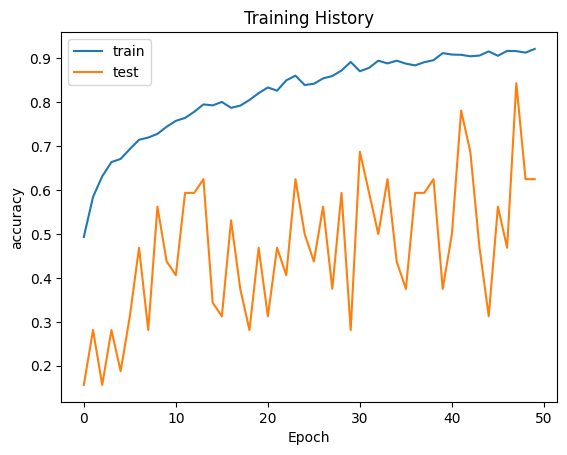

In [18]:
def show_train_history(hisData,train,test):
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
for image_batch, label_batch in train_generator:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 6)


In [26]:
class_names = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash'],
      dtype='<U9')

In [27]:
arr = model.predict(image_batch)
predicted_id = np.argmax(arr, axis=-1)
predicted_label_batch = class_names[predicted_id]
label_id = np.argmax(label_batch, axis=-1)
true_label_batch = class_names[label_id]

1/1 [==============================] - 0s 29ms/step


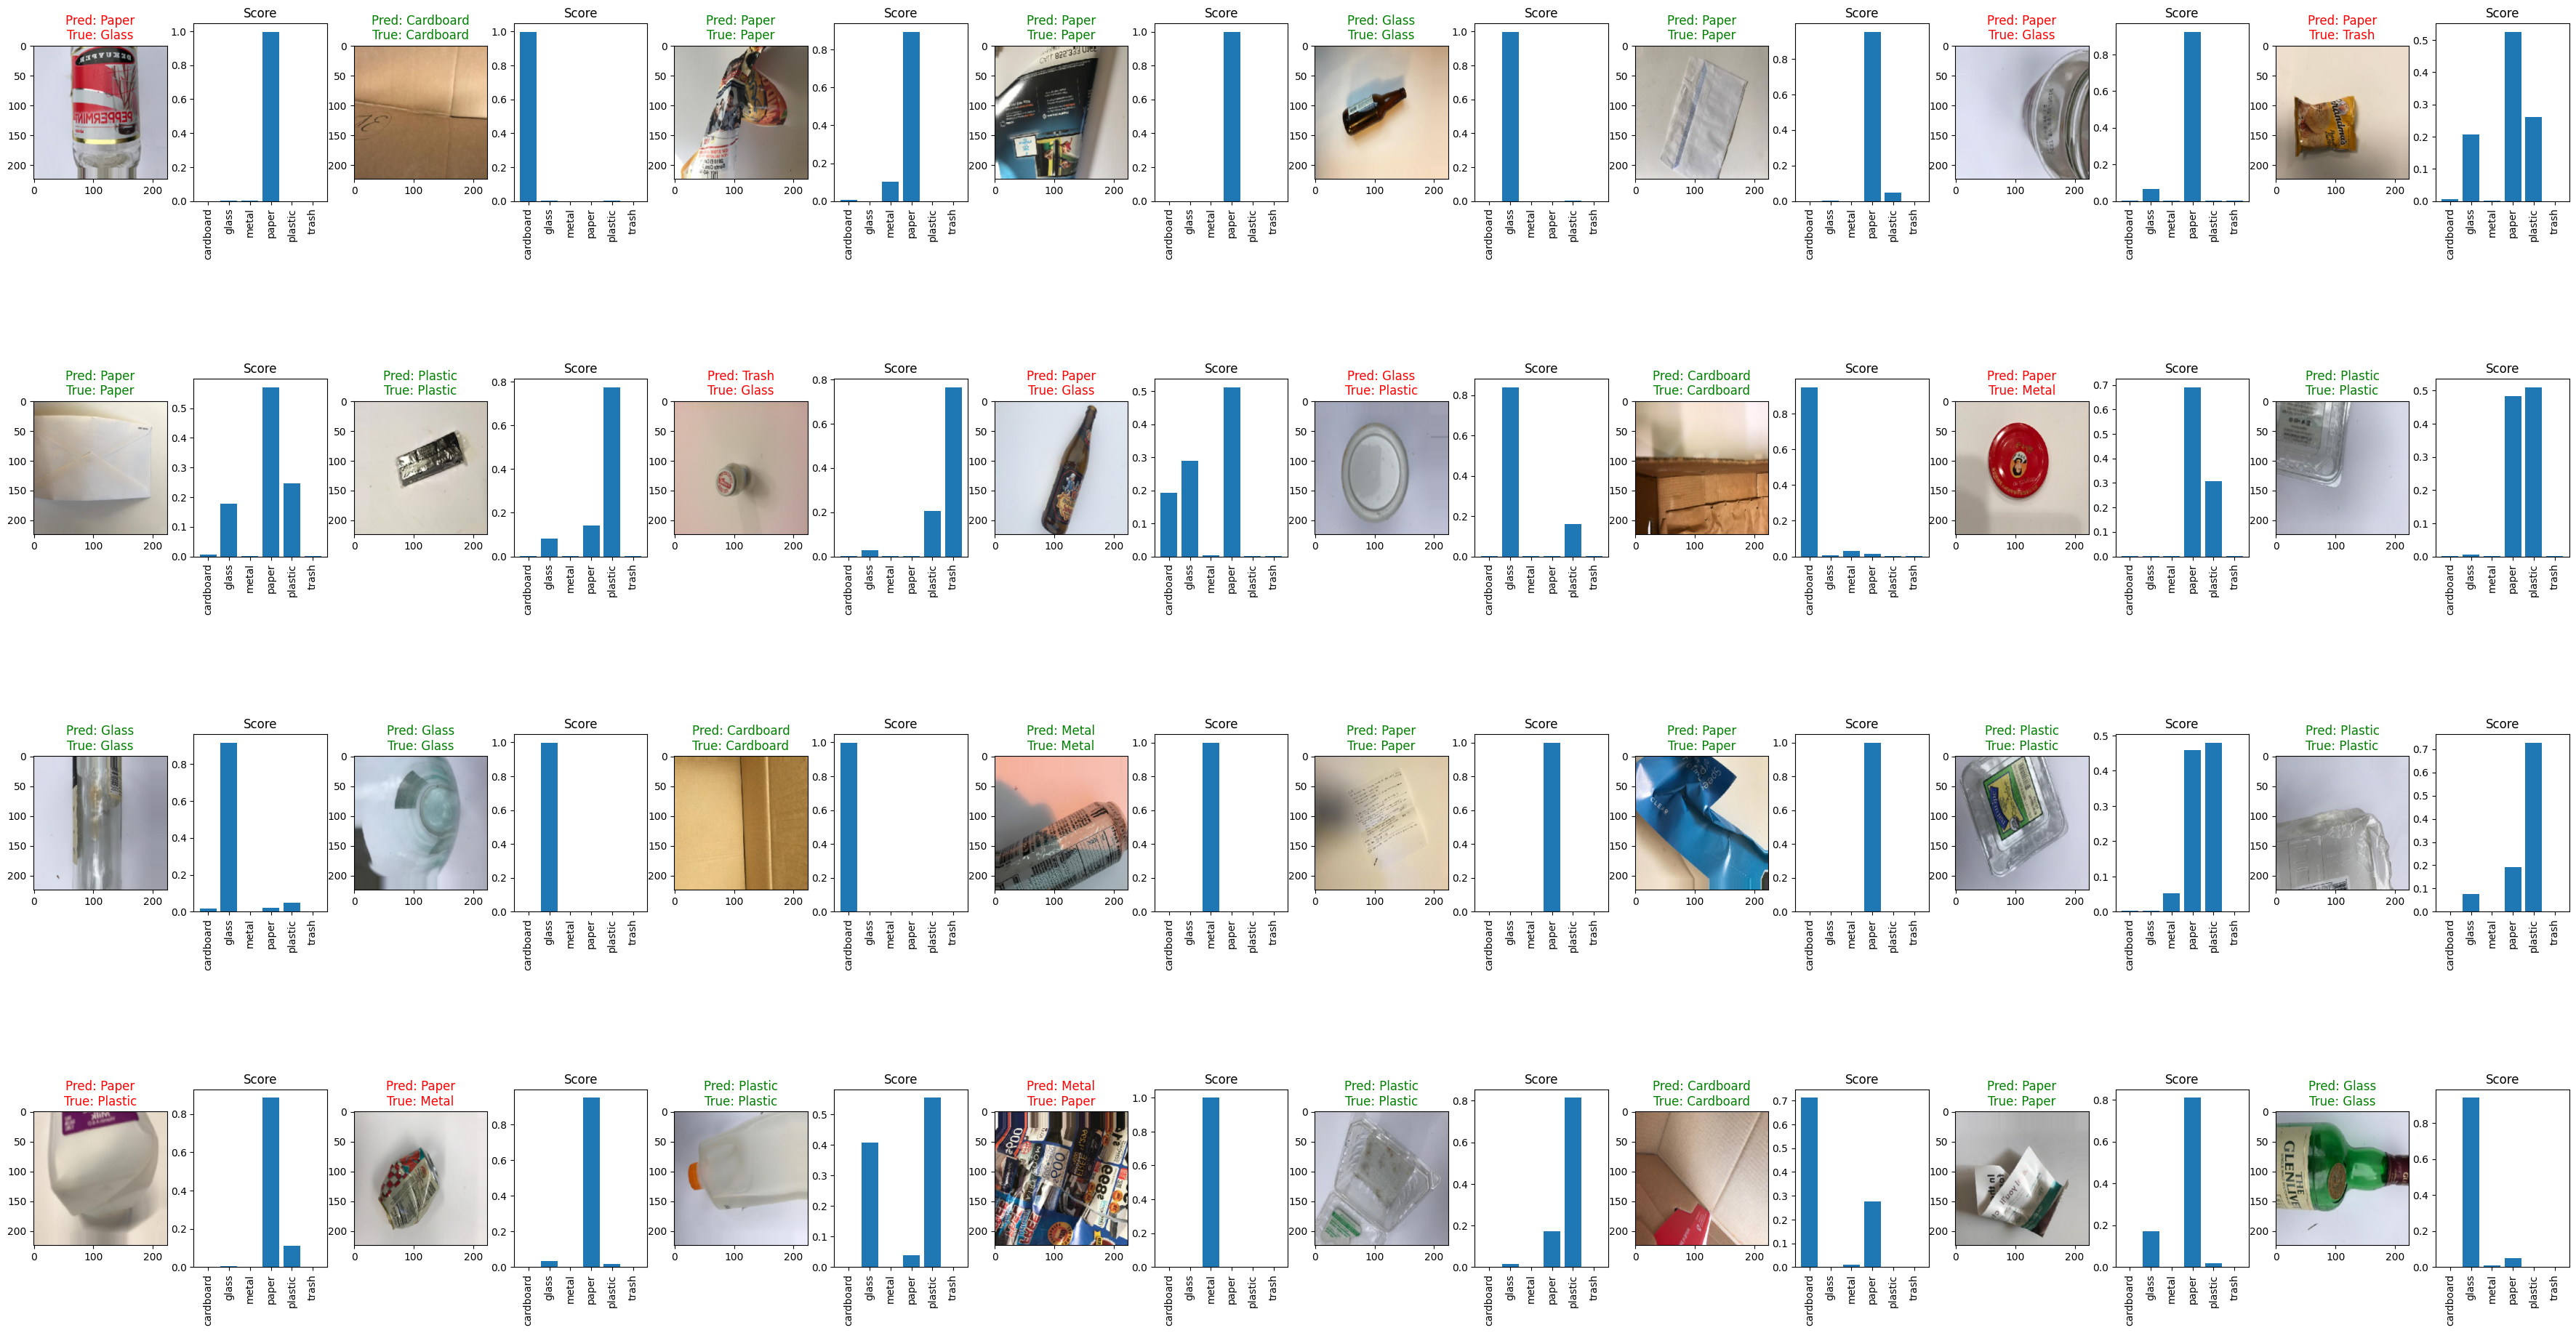

In [29]:
img_counter=0
prob_counter=0

plt.figure(figsize=(45,200))
plt.subplots_adjust(hspace=1)
for n in range(64):

  plt.subplot(32,16,n+1)
  if(n%2==0):
      plt.imshow(image_batch[img_counter])
      color = "green" if predicted_id[img_counter] == label_id[img_counter] else "red"
      plt.title("Pred: "+predicted_label_batch[img_counter].title()+"\nTrue: "+true_label_batch[img_counter], color=color)
      img_counter=img_counter+1

  if(n%2==1):
      plt.title("Score", color="Black")

      data=[arr[prob_counter][0],arr[prob_counter][1],arr[prob_counter][2],
            arr[prob_counter][3], arr[prob_counter][4], arr[prob_counter][5]
            ]

      plt.bar(labels,data)
      plt.xticks(rotation='vertical')

      prob_counter=prob_counter+1

In [22]:
preds=model.predict(test_generator)
y_pred = np.argmax(preds,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

2/2 [==============================] - 1s 545ms/step
[[0 1 0 4 3 0]
 [1 0 1 8 0 0]
 [0 2 1 5 0 0]
 [2 0 2 6 1 0]
 [0 2 1 3 3 0]
 [1 0 0 1 0 0]]


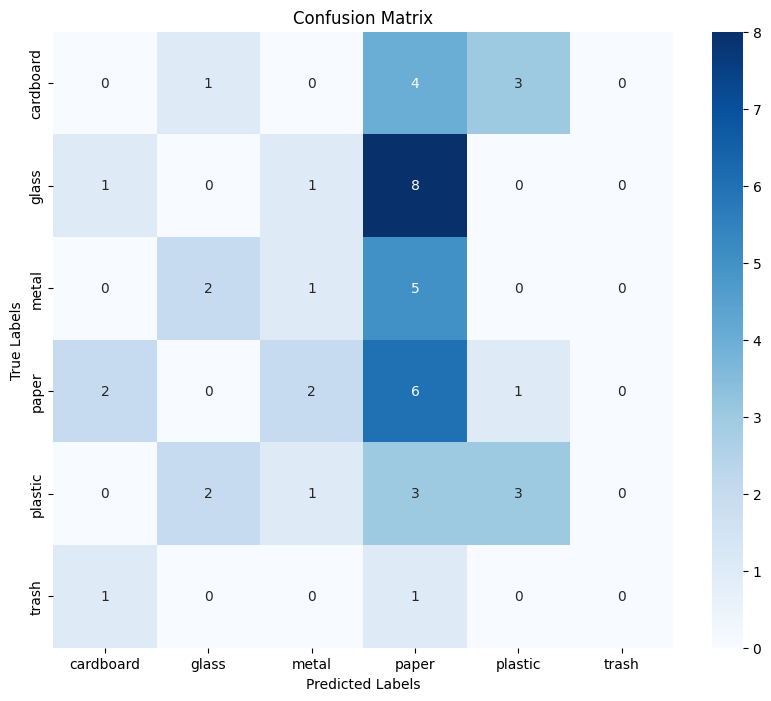

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_actual, y_pred)

# Define class labels
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']  # Replace with your class names

# Create a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [23]:
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00         8
       glass       0.00      0.00      0.00        10
       metal       0.20      0.12      0.15         8
       paper       0.22      0.55      0.32        11
     plastic       0.43      0.33      0.38         9
       trash       0.00      0.00      0.00         2

    accuracy                           0.21        48
   macro avg       0.14      0.17      0.14        48
weighted avg       0.16      0.21      0.17        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00         8
       glass       0.00      0.00      0.00        10
       metal       0.20      0.12      0.15         8
       paper       0.22      0.55      0.32        11
     plastic       0.43      0.33      0.38         9
       trash       0.00      0.00      0.00         2

    accuracy                           0.21        48
   macro avg       0.14      0.17      0.14        48
weighted avg       0.16      0.21      0.17        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
